<a href="https://colab.research.google.com/github/alvarofpinheiro/pifwia_ts/blob/main/PIFWIA_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No Tabu Search o algoritmo salva as K ultimas soluções visitadas e as evita, dessa forma reduzindo a chance de ficar preso em platôs

```
TAMANHO_DA_MEMORIA = 10 # PARAMETRO
ITERACOES = 2000 # PARAMETRO
memoria = []
solucao_inicial = valor_aleatorio_dentro_do_espaco_de_busca()

for i in range(0, 2000):
  nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)

  solucao_ja_testada = true
  while solucao_ja_testada:
    solucao_ja_testada = verificar_se_solucao_na_memoria()
    if solucao_ja_testada:
      nova_solucao = realizar_mudanca_na_solucao(solucao_inicial)

  if len(memoria) == TAMANHO_DA_MEMORIA:
    memoria.pop(0) # remove o primeiro elemento da lista
  memoria.append(nova_solucao) #adiciona um elemento no final da lista

  if fitness(nova_solucao) >= fitness(solucao_inicial): # AQUI COLOCAMOS O IGUAL SEM PROCUPAÇÃO POIS O ALGORITMO TEM O MECANISMO QUE EVITA PLATÔS
    solucao_incial = nova_solucao
```

N Rainhas 

Dado um tabuleiro NxN Coloque nele N rainhas de maneira que nenhuma rainha possa atacar outra (Ou seja não é Permitido colocar uma rainha na mesma linha, coluna ou diagonal que outra)

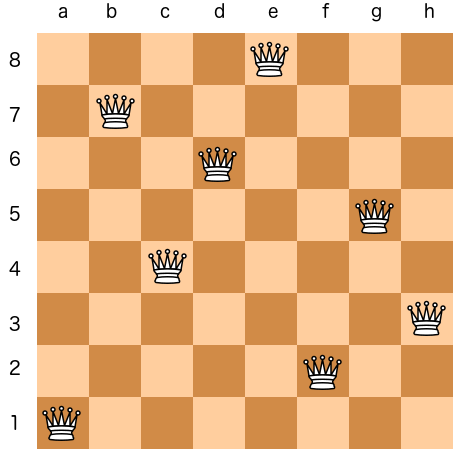

In [2]:
# Importação

import random
import math
import matplotlib.pyplot as plt

In [3]:
# Codigo para o problema das N rainhas

NUMERO_DE_RAINHAS = 25

# No python quando se faz lista_A = lista_B as listas ficam ligadas e caso se 
# mude uma tambem se muda a outra, usar o copy é uma maneira de evitar isso
import copy

class rainha:
  def __init__(self, posicao_x):
    self.x = posicao_x

def gerar_solucao_aleatoria_n_rainhas():
  lista_aleatoria = []
  for i in range(0, NUMERO_DE_RAINHAS):
    lista_aleatoria.append(rainha(random.randint(0, NUMERO_DE_RAINHAS - 1)))
  return lista_aleatoria

def fitness_n_rainhas(possivel_solucao):
  fitness = 0
  for i in range(0, NUMERO_DE_RAINHAS-1): 
    for j in range(i+1, NUMERO_DE_RAINHAS):
      if possivel_solucao[i].x == possivel_solucao[j].x:
        fitness += 1
      if ((possivel_solucao[i].x + j - i) == possivel_solucao[j].x) or ((possivel_solucao[i].x - j + i) == possivel_solucao[j].x):
        fitness += 1
  return fitness

def mudar_solucao_n_rainhas(solucao):
  solucao_modificada = copy.deepcopy(solucao)
  index = random.randint(0, NUMERO_DE_RAINHAS - 1)
  posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  while posicao_1 == solucao_modificada[index].x:
    posicao_1 = random.randint(0, NUMERO_DE_RAINHAS - 1)
  solucao_modificada[index].x = posicao_1
  
  return solucao_modificada

In [6]:
# --- Algoritimo: Tabu Search ---

# Parametros
MAX_NUMERO_DE_ITERACOES_TABU = 4000
MEMORIA_MAXIMA = 10
memoria = []

def executar_tabu_search():

  # É gerada uma solução inicial aleatoria
  solucao_atual = gerar_solucao_aleatoria_n_rainhas()

  # É calculado o fitness da solução incial
  melhor_fitness = fitness_n_rainhas(solucao_atual)

  # É definido um criterio de parada
  numero_de_iteracoes = MAX_NUMERO_DE_ITERACOES_TABU

  # print('Fitness Inicial: ', melhor_fitness)

  # --- Inicio da execução do algoritimo ---

  # Criterio de parada
  for i in range(0, numero_de_iteracoes):

    # Uma nova solução é gerada
    nova_solucao = mudar_solucao_n_rainhas(solucao_atual)

    solucao_ja_testada = True
    while solucao_ja_testada:
      for k in memoria:
        for z in range(0, NUMERO_DE_RAINHAS):
          if k[z].x == nova_solucao[z].x:
            solucao_ja_testada = True
            break
      else:
        solucao_ja_testada = False
      if solucao_ja_testada:
        nova_solucao = realizar_mudanca_na_solucao(solucao_atual)
 
    if len(memoria) == MEMORIA_MAXIMA:
      memoria.pop(0)
    memoria.append(copy.deepcopy(nova_solucao))

    # A nova solução é comparada com a anterior
    if fitness_n_rainhas(nova_solucao) <= fitness_n_rainhas(solucao_atual):
      # Caso ela seja melhor a anterior é substituida pela nova
      solucao_atual.clear()
      for j in range(0, NUMERO_DE_RAINHAS):
        solucao_atual.append(nova_solucao[j])
      # e o melhor fitness é atualizado
      melhor_fitness = fitness_n_rainhas(solucao_atual)

  return melhor_fitness

  # --- Fim da execução do algoritimo ---


In [7]:
# --- Tabu Search ---
NUMERO_DE_EXECUCOES = 8
best = 100000000
media = 0.0
for i in range(0, NUMERO_DE_EXECUCOES):
  aux = executar_tabu_search()
  media += aux
  if aux < best:
    best = aux

print('---------------- N rainhas ---------- Tabu Search -----------------')
print('Melhore resultado de todas as execuções: ', best)
print('Resultado medio: ', "%.3f" % (media/NUMERO_DE_EXECUCOES))
print('-------------------------------------------------------------------\n\n')

---------------- N rainhas ---------- Tabu Search -----------------
Melhore resultado de todas as execuções:  0
Resultado medio:  0.625
-------------------------------------------------------------------


